In [3]:
data = sns.load_dataset('penguins')
display(data)
data = data.species.drop_duplicates()
display(data)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


0         Adelie
152    Chinstrap
220       Gentoo
Name: species, dtype: object

c:\Users\lsantos69\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\lsantos69\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


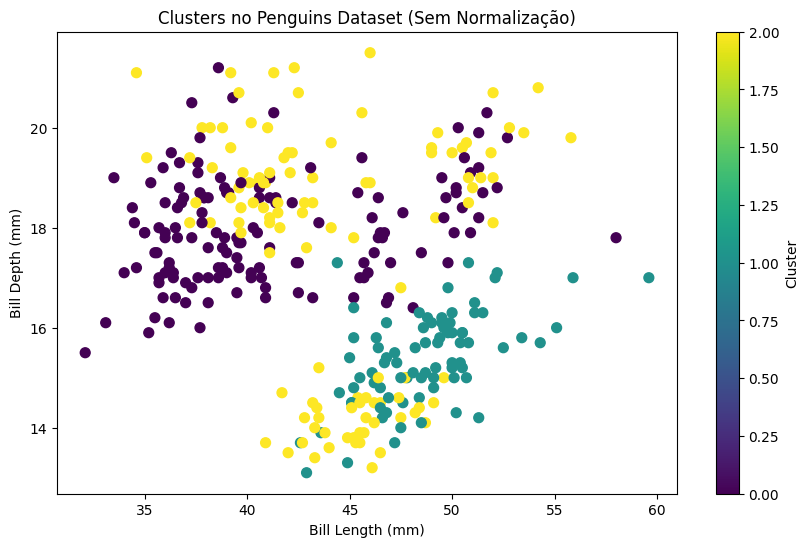

   species  cluster
0   Adelie        0
1   Adelie        0
2   Adelie        0
4   Adelie        0
5   Adelie        0
6   Adelie        0
7   Adelie        2
12  Adelie        0
13  Adelie        0
14  Adelie        2
Empty DataFrame
Columns: []
Index: []
A precisão da classificação é: 0.00


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o Penguins Dataset
data = sns.load_dataset('penguins')

# Remover valores ausentes
data = data.dropna()

# Selecionar os atributos numéricos para clustering
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = data[features]

# Aplicar K-means diretamente nos dados brutos
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Adicionar os clusters ao DataFrame original
data['cluster'] = clusters

# Visualizar os clusters em um gráfico (usando apenas dois atributos para simplicidade)
plt.figure(figsize=(10, 6))
plt.scatter(X[features[0]], X[features[1]], c=clusters, cmap='viridis', s=50)
plt.title("Clusters no Penguins Dataset (Sem Normalização)")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.colorbar(label='Cluster')
plt.show()

# Mostrar as primeiras linhas com os clusters atribuídos
print(data[['species', 'cluster']].head(10))

# Avaliar a precisão da classificação comparando com as espécies reais
species_to_cluster = data.groupby('species')['cluster'].agg(lambda x: x.value_counts().index[0])
data['predicted_species'] = data['cluster'].map(species_to_cluster)

# Mostrar a tabela de contingência entre espécies reais e previstas
contingency_table = pd.crosstab(data['species'], data['predicted_species'])
print(contingency_table)

# Calcular a precisão da classificação
accuracy = np.mean(data['species'] == data['predicted_species'])
print(f"A precisão da classificação é: {accuracy:.2f}")


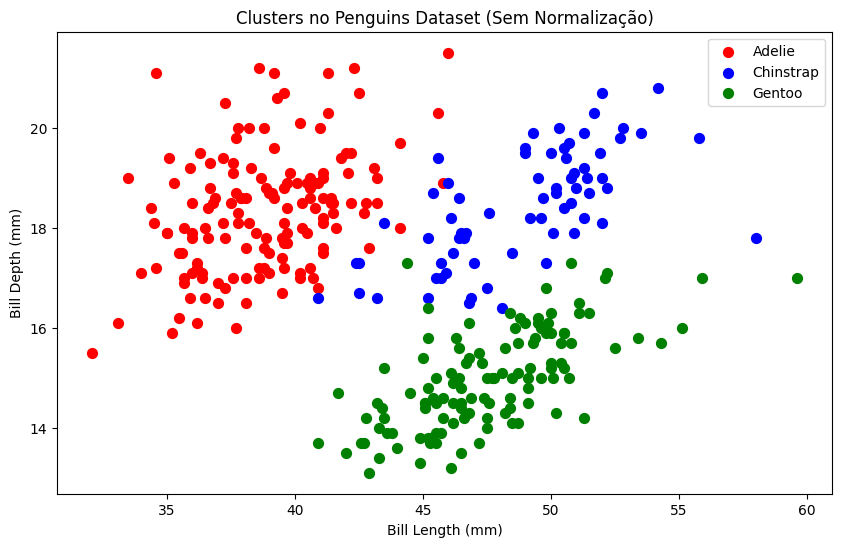

   species  cluster
0   Adelie        0
1   Adelie        0
2   Adelie        0
4   Adelie        0
5   Adelie        0
6   Adelie        0
7   Adelie        2
12  Adelie        0
13  Adelie        0
14  Adelie        2


In [4]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o Penguins Dataset
data = sns.load_dataset('penguins')

# Remover valores ausentes
data = data.dropna()

# Selecionar os atributos numéricos para clustering
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = data[features]

# Aplicar K-means diretamente nos dados brutos
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Adicionar os clusters ao DataFrame original
data['cluster'] = clusters

# Visualizar os clusters em um gráfico (usando apenas dois atributos para simplicidade)
plt.figure(figsize=(10, 6))
species_unique = data['species'].unique()
colors = ['red', 'blue', 'green']

for species, color in zip(species_unique, colors):
    subset = data[data['species'] == species]
    plt.scatter(subset[features[0]], subset[features[1]], c=color, label=species, s=50)

plt.title("Clusters no Penguins Dataset (Sem Normalização)")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend()
plt.show()

# Mostrar as primeiras linhas com os clusters atribuídos
print(data[['species', 'cluster']].head(10))


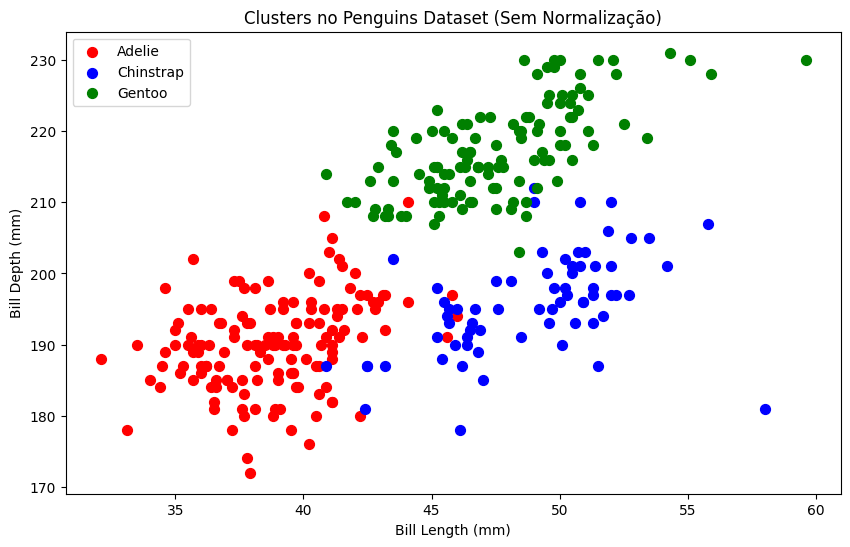

   species  cluster
0   Adelie        2
1   Adelie        2
2   Adelie        0
4   Adelie        2
5   Adelie        2
6   Adelie        2
7   Adelie        0
12  Adelie        2
13  Adelie        2
14  Adelie        0


In [15]:
data = sns.load_dataset('penguins')
data = data.dropna()
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
# features = [ 'flipper_length_mm', 'body_mass_g']
# features = [ 'bill_depth_mm', 'flipper_length_mm']
features = ['bill_length_mm', 'bill_depth_mm']
features = ['bill_length_mm', 'body_mass_g']
features = ['bill_length_mm', 'flipper_length_mm']
X = data[features]
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
data['cluster'] = clusters
plt.figure(figsize=(10, 6))
species_unique = data['species'].unique()
colors = ['red', 'blue', 'green']

for species, color in zip(species_unique, colors):
    subset = data[data['species'] == species]
    plt.scatter(subset[features[0]], subset[features[1]], c=color, label=species, s=50)

plt.title("Clusters no Penguins Dataset (Sem Normalização)")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend()
plt.show()

print(data[['species', 'cluster']].head(10))